
# Analisis Enron Dataset


In [44]:
import numpy as np 
import pandas as pd
import nltk
import matplotlib.pyplot as plt

## Carga de data

In [ ]:
data = pd.read_csv('./emails.csv')

In [ ]:
pd.set_option('display.max_colwidth', -1)
data.head(3)

,file,message
0,allen-p/_sent_mail/1.,"Message-ID: <18782981.1075855378110.JavaMail.evans@thyme>\nDate: Mon, 14 May 2001 16:39:00 -0700 (PDT)\nFrom: phillip.allen@enron.com\nTo: tim.belden@enron.com\nSubject: \nMime-Version: 1.0\nContent-Type: text/plain; charset=us-ascii\nContent-Transfer-Encoding: 7bit\nX-From: Phillip K Allen\nX-To: Tim Belden <Tim Belden/Enron@EnronXGate>\nX-cc: \nX-bcc: \nX-Folder: \Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Sent Mail\nX-Origin: Allen-P\nX-FileName: pallen (Non-Privileged).pst\n\nHere is our forecast\n\n"
1,allen-p/_sent_mail/10.,"Message-ID: <15464986.1075855378456.JavaMail.evans@thyme>\nDate: Fri, 4 May 2001 13:51:00 -0700 (PDT)\nFrom: phillip.allen@enron.com\nTo: john.lavorato@enron.com\nSubject: Re:\nMime-Version: 1.0\nContent-Type: text/plain; charset=us-ascii\nContent-Transfer-Encoding: 7bit\nX-From: Phillip K Allen\nX-To: John J Lavorato <John J Lavorato/ENRON@enronXgate@ENRON>\nX-cc: \nX-bcc: \nX-Folder: \Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Sent Mail\nX-Origin: Allen-P\nX-FileName: pallen (Non-Privileged).pst\n\nTraveling to have a business meeting takes the fun out of the trip. Especially if you have to prepare a presentation. I would suggest holding the business plan meetings here then take a trip without any formal business meetings. I would even try and get some honest opinions on whether a trip is even desired or necessary.\n\nAs far as the business meetings, I think it would be more productive to try and stimulate discussions across the different groups about what is working and what is not. Too often the presenter speaks and the others are quiet just waiting for their turn. The meetings might be better if held in a round table discussion format. \n\nMy suggestion for where to go is Austin. Play golf and rent a ski boat and jet ski's. Flying somewhere takes too much time.\n"
2,allen-p/_sent_mail/100.,"Message-ID: <24216240.1075855687451.JavaMail.evans@thyme>\nDate: Wed, 18 Oct 2000 03:00:00 -0700 (PDT)\nFrom: phillip.allen@enron.com\nTo: leah.arsdall@enron.com\nSubject: Re: test\nMime-Version: 1.0\nContent-Type: text/plain; charset=us-ascii\nContent-Transfer-Encoding: 7bit\nX-From: Phillip K Allen\nX-To: Leah Van Arsdall\nX-cc: \nX-bcc: \nX-Folder: \Phillip_Allen_Dec2000\Notes Folders\'sent mail\nX-Origin: Allen-P\nX-FileName: pallen.nsf\n\ntest successful. way to go!!!"


## Preprocesamiento

### Cabeceras

Se generan los campos correspondientes a la cabecera del correo


In [ ]:
import email
mails = data.copy(deep=True)
message_db = list(map(email.message_from_string,data['message']))
keys = list(email.message_from_string(data.iloc[0]['message']))
for key in keys:
    mails[key] = [doc[key] for doc in message_db]

### Cuerpo

Se genera el cuerpo del mensaje

In [ ]:
mails['body'] = list(map(lambda x:''.join([part.get_payload() for part in x.walk() if part.get_content_type()=='text/plain']),message_db))

### Filtrado

En vista que la volumetría de datos excede la capacidad del servidor, se procedera a tomar los correos de los contactos con mayor actividad. Esta informacion proviene de:

*   https://www.theguardian.com/business/2002/jan/13/corporatefraud.enron
*   http://web.cs.mun.ca/~banzhaf/papers/Enron_CEC2009_IEEE.pdf



In [ ]:
employees = ['jeff.skilling','andrew.fastow','kenneth.lay','mark.frevert','greg.whalley','jeffrey.mcmahon',\
             'mike.grigsby','matt.motley','keith.holst','joe.stepenovitch','scott.neal','jane.tholt']
employees = list(map(lambda x: x + '@enron.com',employees))
len(mails[list(map(lambda x: x in employees,mails['From']))])

5264

In [ ]:
mails = mails[list(map(lambda x,y: (x in employees)|(y in employees),mails['From'],mails['To']))]
len(mails)

11091

### Limpieza


Se procesa y limpia la informacion de los campos de cabecera.

In [ ]:
mails['Date']=pd.to_datetime(mails['Date'],infer_datetime_format=True)

In [ ]:
mails['To'] = mails['To'].map(lambda y: {x.strip() for x in y.split(',')} if y!=None else None)

In [ ]:
mails['From'] = mails['From'].map(lambda y: {x.strip() for x in y.split(',')} if y!=None else None)

In [ ]:
mails.drop(columns=['Mime-Version','Content-Type','Content-Transfer-Encoding','X-From','X-To','X-Folder','X-Origin','X-FileName','message'],inplace=True)

### Limpieza del Cuerpo

Se reemplazan los caracteres de nueva linea por espacios (que son transparentes para el tokenizador)

In [ ]:
mails['body_clean'] = mails['body'].map(lambda x: ' '.join(x.split('\n')))
mails['body_clean'] = mails['body_clean'].map(lambda x: ' '.join(x.split('\t')))

Debemos deshacernos de las partes de cabecera de los mensajes (aparecen cuando se Forwardea el mensaje)

In [ ]:
# Ejemplo
mails.loc[mails['body_clean'].map(lambda x: True if 'Forwarded' in x else False)][['Subject','body_clean']].head(1)

Subject  \
12  Consolidated positions: Issues & To Do list   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

Se define una funcion para limpiar el mensaje

In [ ]:
import re
def limpiar_FW(message_body,subject):
  clean = message_body.strip()
  try:
    cadena = re.findall(r'\-+.+Subject:\W?'+subject,message_body)
    if cadena!=[]:
      for match in cadena:
        clean = clean.replace(match,'').strip()
    return clean
  except:
    return clean

In [ ]:
limpiar_FW(mails.iloc[9]['body_clean'],mails.iloc[9]['Subject'])

"Slides from this week's strategy session are attached:"

In [ ]:
mails['body_clean']=list(map(lambda x,y: limpiar_FW(x,y),mails['body_clean'],mails['Subject']))

In [ ]:
mails.loc[mails['body_clean'].map(lambda x: True if 'Forwarded' in x else False)][['Subject','body_clean']].head()

Subject  \
412   Re: Enron's March Basdeload Fixed price physical deals as of 2/27\n\t\t/01 Attachment is free from viruses. Scan Mail   
465   Smeltering                                                                                                              
580   California Update 5/4/01                                                                                                
1034  Re: Enron's March Basdeload Fixed price physical deals as of 2/27\n\t\t/01 Attachment is free from viruses. Scan Mail   
1088  Smeltering                                                                                                              

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [ ]:
def limpiar_FW2(message_body):
  clean = message_body.strip()
  try:
    cadena = re.findall(r'\-+.+Description:',message_body)
    if cadena!=[]:
      for match in cadena:
        clean = clean.replace(match,'').strip()
    return clean
  except:
    return clean

In [ ]:
mails['body_clean']=list(map(limpiar_FW2,mails['body_clean']))

In [ ]:
mails.loc[mails['body_clean'].map(lambda x: True if 'Forwarded' in x else False)][['Subject','body_clean']].head(3)

Subject  \
412  Re: Enron's March Basdeload Fixed price physical deals as of 2/27\n\t\t/01 Attachment is free from viruses. Scan Mail   
465  Smeltering                                                                                                              
580  California Update 5/4/01                                                                                                

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [ ]:
def limpiar_FW3(message_body):
  clean = message_body.strip()
  try:
    cadena = re.findall(r'\-+.+Subject:',message_body)
    if cadena!=[]:
      for match in cadena:
        clean = clean.replace(match,'').strip()
    return clean
  except:
    return clean

In [ ]:
mails['body_clean']=list(map(limpiar_FW3,mails['body_clean']))

In [ ]:
mails.loc[mails['body_clean'].map(lambda x: True if 'Forwarded' in x else False)][['Subject','body_clean']].head(3)

,Subject,body_clean
44018,FW: Fw: Candle Lighting - Please participate / FW: U.S.Pride Day\t!!,"Candle Lighting-Please participate > > Whether you choose to do this or not, is up to you, but I believe it is a > positive idea in the middle of all of this tragedy. > > Friday Night at 7:00 p.m. step out your door, stop your car, or step out of > your establishment and light a candle. We will show the world that Americans > are strong and united together against terrorism. Please pass this to > everyone on your e-mail list. We need to reach everyone across the United > States quickly. > > The message: WE STAND UNITED - WE WILL NOT TOLERATE TERRORISM. > > We need press to cover this-- we need the world to see. > > > Tomorrow (9-13-01)is U.S. Color day. Red, White & Blue should be worn in > honor of > our > fellow Americans that died. Jeans > worn will be blue. The goal is to get the whole nation to patricipate. > Send > this to 10 other people. > > In memory of all those who perished; the passengers and the > pilots on the United Air and AA flights, the workers in the World Trade > Center and the Pentagon, and all the innocent bystanders. Our prayers go > out > to the friends and families of the deceased. Send this to at least 10 > people > to show your support. DONT BREAK IT!!!!!! God's speed to all those who > have > lost their lives...GOD BLESS AMERICA and the freedom it represents > > > > > > > > > > > > ------ End of Forwarded Message"
168473,FW: Fw: Candle Lighting - Please participate / FW: U.S.Pride Day\t!!,"Candle Lighting-Please participate > > Whether you choose to do this or not, is up to you, but I believe it is a > positive idea in the middle of all of this tragedy. > > Friday Night at 7:00 p.m. step out your door, stop your car, or step out of > your establishment and light a candle. We will show the world that Americans > are strong and united together against terrorism. Please pass this to > everyone on your e-mail list. We need to reach everyone across the United > States quickly. > > The message: WE STAND UNITED - WE WILL NOT TOLERATE TERRORISM. > > We need press to cover this-- we need the world to see. > > > Tomorrow (9-13-01)is U.S. Color day. Red, White & Blue should be worn in > honor of > our > fellow Americans that died. Jeans > worn will be blue. The goal is to get the whole nation to patricipate. > Send > this to 10 other people. > > In memory of all those who perished; the passengers and the > pilots on the United Air and AA flights, the workers in the World Trade > Center and the Pentagon, and all the innocent bystanders. Our prayers go > out > to the friends and families of the deceased. Send this to at least 10 > people > to show your support. DONT BREAK IT!!!!!! God's speed to all those who > have > lost their lives...GOD BLESS AMERICA and the freedom it represents > > > > > > > > > > > > ------ End of Forwarded Message"
341222,Re: Need your approval - Generic ID Request -- 2nd Letter,"see approval attached Bhavna Pandya 08/09/2000 09:59 AM To: Scott Neal/HOU/ECT@ECT cc: Roberto Deleon/Corp/Enron@Enron Subject: Need your approval Generic ID Request Security Request # KBRN-4MNKFG for Generic ID is not compliant with Enron Company Policy. Before your request can be processed, please complete the attached Risk Acceptance Form and return no later than 8/7/2000. Please ensure that you follow the instructions at the bottom of the form. Please note that no privileges will be granted until the approved/completed form is returned. Thanks! Risk Management & Audit ---------------------- Forwarded by IRM Audit/Corp/Enron on 07/31/2000 11:15 AM --------------------------- Security Resource Request System Application Line Item Pending Access Approval Application Name: Risk Acceptance How to process this request... For: bhavna pandya Request Type: Grant Role(s): Generic ID Comments: (Per Bhavna, needs generic ID so that anyone can log on to a particular PC that has certain ""codes"" that a developer will save to t

In [ ]:
def limpiar_FW4(message_body):
  clean = message_body.strip()
  try:
    cadena = re.findall(r'\-+.+[A|P]M',message_body)
    if cadena!=[]:
      for match in cadena:
        clean = clean.replace(match,'').strip()
    return clean
  except:
    return clean

In [ ]:
mails['body_clean']=list(map(limpiar_FW4,mails['body_clean']))

In [ ]:
mails.loc[mails['body_clean'].map(lambda x: True if 'Forwarded' in x else False)][['Subject','body_clean']]

,Subject,body_clean
44018,FW: Fw: Candle Lighting - Please participate / FW: U.S.Pride Day\t!!,Candle LightingERICA and the freedom it represents > > > > > > > > > > > > ------ End of Forwarded Message
168473,FW: Fw: Candle Lighting - Please participate / FW: U.S.Pride Day\t!!,Candle LightingERICA and the freedom it represents > > > > > > > > > > > > ------ End of Forwarded Message
498795,RE: UK P/L,"What is the structured derivatives portfolio and what is in it? > >Greg, >See note below for detail but here is the exec summary. > >We had a couple of big shifts on the curves yesterday which I want you to be aware of. We wanted to put several major adjustments through on the same day. The main moves are as follows: > >Increased gas volatility - we moved the curve up significantly for the first several years. Lose o16mm >Power Peaks down, off-peaks up across the whole curve. Gain o10mm > >Because ""structured Derivatives"" is a separate line item, this book loses $43mm today, with power making approx $40mm to off-set. The $43mm may need to be reported to Skilling, even though the real loss is just the gas loss of o16mm. > >(There were several other clear up items put through, but the above represents the main issues to be aware of. Net on the day we are up, and still expect to hit Q4 targets.). > >Regards > >Richard >---------------------- Forwarded by Richard Lewis/LON/ECT on 07/12/2000 11:49 --------------------------- > > >James New >06/12/2000 18:18 >To: John S > ><truncated...>"
499494,RE: UK P/L,"What is the structured derivatives portfolio and what is in it? > >Greg, >See note below for detail but here is the exec summary. > >We had a couple of big shifts on the curves yesterday which I want you to be aware of. We wanted to put several major adjustments through on the same day. The main moves are as follows: > >Increased gas volatility - we moved the curve up significantly for the first several years. Lose o16mm >Power Peaks down, off-peaks up across the whole curve. Gain o10mm > >Because ""structured Derivatives"" is a separate line item, this book loses $43mm today, with power making approx $40mm to off-set. The $43mm may need to be reported to Skilling, even though the real loss is just the gas loss of o16mm. > >(There were several other clear up items put through, but the above represents the main issues to be aware of. Net on the day we are up, and still expect to hit Q4 targets.). > >Regards > >Richard >---------------------- Forwarded by Richard Lewis/LON/ECT on 07/12/2000 11:49 --------------------------- > > >James New >06/12/2000 18:18 >To: John S > ><truncated...>"
500191,RE: UK P/L,"What is the structured derivatives portfolio and what is in it? > >Greg, >See note below for detail but here is the exec summary. > >We had a couple of big shifts on the curves yesterday which I want you to be aware of. We wanted to put several major adjustments through on the same day. The main moves are as follows: > >Increased gas volatility - we moved the curve up significantly for the first several years. Lose o16mm >Power Peaks down, off-peaks up across the whole curve. Gain o10mm > >Because ""structured Derivatives"" is a separate line item, this book loses $43mm today, with power making approx $40mm to off-set. The $43mm may need to be reported to Skilling, even though the real loss is just the gas loss of o16mm. > >(There were several other clear up items put through, but the above represents the main issues to be aware of. Net on the day we are up, and still expect to hit Q4 targets.). > >Regards > >Richard >---------------------- Forwarded by Richard Lewis/LON/ECT on 07/12/2000 11:49 --------------------------- > > >James New >06/12/2000 18:18 >To: John S > ><truncated...>"
501131,RE: UK P/L,"""Structured Derivatives"" holds the spread options from the Eastern VPS deals. We hedge with swaps to the power and gas books, leaving all our gamma and vega exposure. The $43mm is a big gamma loss because of the moving power curve 

También se observa la existencia de mensajes que tienen la frase Original Message. En tales casos, se trata de respuestas a mensajes, por lo que puede eliminarse todo lo que viene después de la primera coincidencia de 'Original Message'.

In [ ]:
def limpiar_OM(message_body):
  clean = message_body.strip()
  try:
    cadena = re.findall(r'\-+.+Original Message.+',message_body)
    if cadena!=[]:
      for match in cadena:
        clean = clean.replace(match,'').strip()
    return clean
  except:
    return clean

In [ ]:
mails['body_clean']=list(map(limpiar_OM,mails['body_clean']))

Se observa también la existencia de mensajes que incluyen direcciones de correo electrónico en su interior. Estas direcciones no aportan al contenido, por lo que se eliminan.

In [ ]:
def clean_from_mails(message):
  mail_addresses = re.findall(r'\(?[A-Za-z0-9_\-\.]+@[A-Za-z0-9_\-\.]+\.com\)?',message)
  if mail_addresses != []:
    for mail_address in mail_addresses:
      message=message.replace(mail_address,'').strip()
  return message

In [ ]:
mails['body_clean']=mails['body_clean'].map(clean_from_mails)

Finalmente, se estandariza el contenido del mensaje. Para ello, primero se elimina todo caracter que no pertenezca al alfabeto inglés. Finalmente, se pasa todo a minúsculas.

In [ ]:
mails['body_clean']=mails['body_clean'].map(lambda x: ' '.join(re.sub(r'[^a-zA-Z]',' ',x).split()))
mails['body_clean']=mails['body_clean'].map(lambda x: x.lower())

Se exporta el resultado para no tener que repetir todo lo anterior para la siguiente etapa.

In [ ]:
mails.to_csv('mails_cleaned.csv')

# Analisis

In [1]:
import pandas as pd
data = pd.read_csv('./mails_cleaned_v2.csv')
#mails=data.drop(columns='Unnamed: 0').set_index('Message-ID').reset_index()
mails=data.drop(columns='Unnamed: 0').set_index('Message-ID')
mails=mails.dropna(axis=0,subset=['body_clean'],how='any')

In [2]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

from collections import Counter
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline

[nltk_data] Downloading package punkt to /home/kref/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/kref/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/kref/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


## Stopwords

In [3]:
my_stopwords = stopwords.words('english')
# Excluir palabras de una sola letra
for i in range(ord('a'),ord('z')+1):
  my_stopwords.append(chr(i))

# Palabras formales o comunes en un correo
my_stopwords.append('would')
my_stopwords.append('also')
my_stopwords.append('shall')
my_stopwords.append('please')
my_stopwords.append('thank')
my_stopwords.append('thanks')
my_stopwords.append('fyi')
my_stopwords.append('regards')
my_stopwords.append('attached')
my_stopwords.append('attach')
my_stopwords.append('like')
my_stopwords.append('said')
my_stopwords.append('told')
my_stopwords.append('let')
my_stopwords.append('get')
my_stopwords.append('need')
my_stopwords.append('call')
my_stopwords.append('know')

# Palabras vinculadas con tiempo
my_stopwords.append('ect')
my_stopwords.append('hou')
my_stopwords.append('pm')
my_stopwords.append('am')
my_stopwords.append('tcl')
my_stopwords.append('day')
my_stopwords.append('week')
my_stopwords.append('month')
my_stopwords.append('year')

# Palabras vinculadas con la web
my_stopwords.append('http')
my_stopwords.append('www')
my_stopwords.append('subject')
my_stopwords.append('cc')
my_stopwords.append('doc')
my_stopwords.append('pdf')
my_stopwords.append('xls')
my_stopwords.append('edu')
my_stopwords.append('org')
my_stopwords.append('com')
my_stopwords.append('net')
my_stopwords.append('us')
my_stopwords.append('mp')
my_stopwords.append('one')
my_stopwords.append('font')
my_stopwords.append('tr')
my_stopwords.append('td')
my_stopwords.append('br')
my_stopwords.append('class')
my_stopwords.append('width')
my_stopwords.append('align')
my_stopwords.append('size')
my_stopwords.append('new')
my_stopwords.append('gif')
my_stopwords.append('href')
my_stopwords.append('elink')
my_stopwords.append('script')
my_stopwords.append('image')
my_stopwords.append('images')
my_stopwords.append('arial')
my_stopwords.append('helvetica')

my_stopwords.append('utc')
my_stopwords.append('kr')
my_stopwords.append('sj')
my_stopwords.append('liz')
my_stopwords.append('anne')
my_stopwords.append('karen')
my_stopwords.append('kathy')
my_stopwords.append('kimberly')
my_stopwords.append('delainey')
my_stopwords.append('lavorato')
my_stopwords.append('spreadsheet')
my_stopwords.append('ina')
my_stopwords.append('hey')
my_stopwords.append('waha')
my_stopwords.append('awhile')
my_stopwords.append('lily')
my_stopwords.append('alejandra')
my_stopwords.append('kimberly')
my_stopwords.append('chavez')
my_stopwords.append('adobe')
my_stopwords.append('acrobat')
my_stopwords.append('reader')
my_stopwords.append('salomon')
my_stopwords.append('api')
my_stopwords.append('emaillink')
my_stopwords.append('eott')

my_stopwords.append('murray')
my_stopwords.append('expensexms')
my_stopwords.append('ops')
my_stopwords.append('lsu')
my_stopwords.append('biliana')
my_stopwords.append('ben')
my_stopwords.append('julie')
my_stopwords.append('stepenovitch')

my_stopwords.append('nx')
my_stopwords.append('itcapps')
my_stopwords.append('auth')
my_stopwords.append('srrs')
my_stopwords.append('kroll')
my_stopwords.append('continu')
my_stopwords.append('effecti')

my_stopwords.append('garland')
my_stopwords.append('humphrey')
my_stopwords.append('swg')
my_stopwords.append('gda')
my_stopwords.append('patti')
my_stopwords.append('kris')
my_stopwords.append('robin')
my_stopwords.append('redwood')
my_stopwords.append('dale')
my_stopwords.append('asap')
my_stopwords.append('kean')

my_stopwords.append('cindy')
my_stopwords.append('max')
my_stopwords.append('ext')
my_stopwords.append('acqshipper')
my_stopwords.append('ipo')
my_stopwords.append('prc')
my_stopwords.append('ext')
print(f'Stopwords final ({len(my_stopwords)}):')
print(my_stopwords)

Stopwords final (322):
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 

In [4]:
def clean_msg_stopwords(message_body):
    words = message_body.split()
    words = [w for w in words if w not in set(my_stopwords)]
    return ' '.join(words)

In [5]:
mails["body_clean"]=mails.body_clean.apply(clean_msg_stopwords)

## Tokenizacion

In [6]:
word_vector = []
for doc in mails['body_clean']:
  word_vector.append(doc.split())
my_vocabulary = [item for sublist in word_vector for item in sublist]

In [7]:
print(f'El vocabulario consta de {len(my_vocabulary)} elementos y {len(set(my_vocabulary))} palabras diferentes.')

El vocabulario consta de 1028048 elementos y 31733 palabras diferentes.


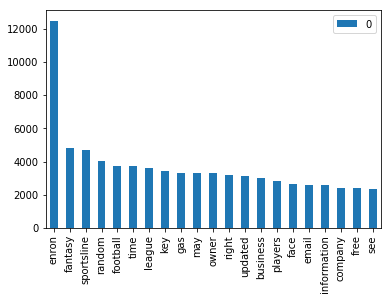

In [8]:
from collections import Counter
word_counts = Counter(my_vocabulary)
df = pd.DataFrame.from_dict(word_counts, orient='index')
df = df.sort_values(0,ascending=False)
df.iloc[0:21].plot(kind='bar')

## Lematizacion

In [9]:
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer
lemma = WordNetLemmatizer()

def lemmatize_body(message_body):
  return ' '.join(lemma.lemmatize(word) for word in message_body.split())

[nltk_data] Downloading package wordnet to /home/kref/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [10]:
lemma_vector = []
for doc in mails['body_clean']:
  lemma_vector.append(lemmatize_body(doc).split())
my_lema_voc = [item for sublist in lemma_vector for item in sublist]

In [11]:
print(f'El vocabulario de lemas consta de {len(my_lema_voc)} elementos y {len(set(my_lema_voc))} palabras diferentes.')

El vocabulario de lemas consta de 1028048 elementos y 28998 palabras diferentes.


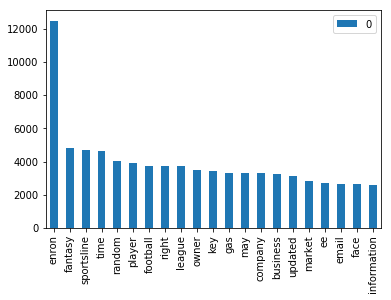

In [12]:
from collections import Counter
lema_counts = Counter(my_lema_voc)
df_lema = pd.DataFrame.from_dict(lema_counts, orient='index')
df_lema = df_lema.sort_values(0,ascending=False)
df_lema.iloc[0:21].plot(kind='bar')
df_lema=df_lema.reset_index()
df_lema.columns=['word','freq']

In [13]:
mails['body_lemma'] = mails['body_clean'].map(lemmatize_body)

## Reduccion por frecuencia

In [14]:
def asignar_rango(freq):
  if freq > 10000:
    return '1'
  elif freq > 5000:
    return '2'
  elif freq > 1000:
    return '3'
  elif freq > 600:
    return '4'
  elif freq > 300:
    return '5'
  elif freq > 1:
    return '6'
  else:
    return '7'

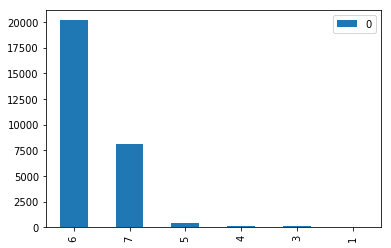

In [15]:
from collections import Counter
df_lema['freq_group']=df_lema['freq'].map(asignar_rango)
df_lema_rango = list(df_lema['freq_group'])
rango_lema_c = Counter(df_lema_rango)
df_lema_count = pd.DataFrame.from_dict(rango_lema_c, orient='index')
df_lema_count = df_lema_count.sort_values(0,ascending=False)
df_lema_count.plot(kind='bar')

Se elimina palabras con frecuencia 1, ya que para analizar similitud no aportan y actúan como llaves primarias.

In [16]:
my_lem_vocab = df_lema.drop(df_lema.loc[df_lema['freq']==1].index)
print(f'El nuevo vocabulario tiene {len(my_lem_vocab)} palabras.')

El nuevo vocabulario tiene 20866 palabras.


Se eliminan las palabras más repetidas, ya que actúan como stopwords. Se elimina el 5% superior.

In [17]:
percentile_lim = my_lem_vocab['freq'].quantile(0.95)
my_lem_vocab = my_lem_vocab.drop(df_lema.loc[df_lema['freq']>percentile_lim].index)
print(f'El vocabulario final tiene {len(my_lem_vocab)} palabras')

El vocabulario final tiene 19824 palabras


# Clusterizacion

## Analisis con una muestra del corpus

Para probar los modelos, se usara una muestra de 7K correos. Asimismo, se reduce el vocabulario a solo palabras con una frecuencia mayor a 100. El objetivo de esta parte es solo validar si el enfoque es válido y también para fines demostrativos. Posteriormente se trabajará con el corpus completo y un vocabulario más grande.

In [ ]:
# Recuperacion de muestra aleatoria para poder reproducir el experimento
analysis_df = pd.read_csv('./muestra.csv', header=None)
analysis_df = analysis_df[[isinstance(x, str) for x in analysis_df[1]]]
mails = mails.loc[analysis_df[0],:]

In [18]:
my_lem_vocab = df_lema.drop(df_lema.loc[df_lema['freq']<=100].index)
print(f'El nuevo vocabulario tiene {len(my_lem_vocab)} palabras.')

El nuevo vocabulario tiene 1912 palabras.


In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(vocabulary=my_lem_vocab['word'],max_df=0.5,min_df=2)
analysis_df = mails['body_lemma']
tf_idf_m = vectorizer.fit_transform(analysis_df.tolist())

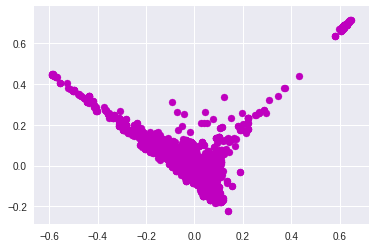

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline

n=2
tf_idf_dense = tf_idf_m.todense()
coords = PCA(n_components=n).fit_transform(tf_idf_dense)

plt.scatter(coords[:, 0], coords[:, 1], c='m')
plt.show()

Se crea un pipeline para simular un k-means esferico, que es análogo a usar la similitud coseno como métrica de distancia. Revisar:
* https://scikit-learn.org/0.19/auto_examples/text/document_clustering.html
* https://stats.stackexchange.com/questions/299013/cosine-distance-as-similarity-measure-in-kmeans

Se aplica el método del codo (elbow criterion method) sobre este pipeline para determinar el valor optimo de K para el conjunto de análisis. Código del gráfico en: https://stackoverflow.com/questions/19197715/scikit-learn-k-means-elbow-criterion

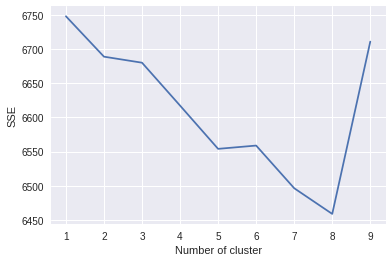

In [ ]:
sse = {}
normalizer = Normalizer(copy=False)
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=100,init='k-means++', n_init=1)
    spherical_kmeans = make_pipeline(normalizer, kmeans)
    analysis_df["clusters"] = spherical_kmeans.fit_predict(tf_idf_m)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

Utilizando el valor de k=8, se lleva a cabo la clusterizacion y se proyecta el resultado sobre el espacio de 2 dimensiones.

In [ ]:
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

n_clusters = 8

normalizer = Normalizer(copy=False)
clf = KMeans(n_clusters=n_clusters, max_iter=100, init='k-means++', n_init=1)
spherical_kmeans = make_pipeline(normalizer, clf)

labels = clf.fit_predict(tf_idf_m)

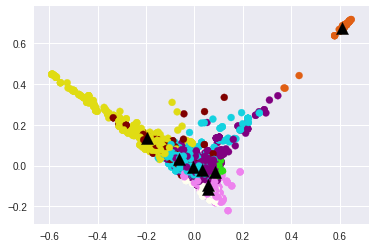

In [ ]:
label = ["#e05f14", "#e0dc14", "#2fe014", "#14d2e0","#ee82ee","#fffff0","#800000","#800080"]
color = [label[i] for i in labels]
plt.scatter(coords[:, 0], coords[:, 1], c=color)

centroids = clf.cluster_centers_
centroidpoint = PCA(n_components=n).fit(tf_idf_dense).transform(centroids)
plt.scatter(centroidpoint[:, 0], centroidpoint[:, 1], marker='^', s=150, c='#000000')

plt.show()

In [ ]:
import numpy as np
def top_tfidf_feats(row, features, top_n=20):
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats, columns=['features', 'score'])
    return df
def top_feats_in_doc(X, features, row_id, top_n=25):
    row = np.squeeze(X[row_id].toarray())
    return top_tfidf_feats(row, features, top_n)
def top_mean_feats(X, features,grp_ids=None, min_tfidf=0.1, top_n=25):
  if grp_ids:
       D = X[grp_ids].toarray()
  else:
       D = X.toarray()
  D[D < min_tfidf] = 0
  tfidf_means = np.mean(D, axis=0)
  return top_tfidf_feats(tfidf_means, features, top_n)
def top_feats_per_cluster(X, y, features, min_tfidf=0.1, top_n=25):
    dfs = []
    labels = np.unique(y)
    for label in labels:
        ids = np.where(y==label) 
        feats_df = top_mean_feats(X, features, ids, min_tfidf=min_tfidf, top_n=top_n)
        feats_df.label = label
        dfs.append(feats_df)
    return dfs
def plot_tfidf_classfeats_h(dfs):
    fig = plt.figure(figsize=(12, 9), facecolor="w")
    x = np.arange(len(dfs[0]))
    for i, df in enumerate(dfs):
        ax = fig.add_subplot(1, len(dfs), i+1)
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.set_frame_on(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()
        ax.set_xlabel("Tf-Idf Score", labelpad=16, fontsize=14)
        ax.set_title("cluster = " + str(df.label), fontsize=16)
        ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
        ax.barh(x, df.score, align='center', color='#7530FF')
        ax.set_yticks(x)
        ax.set_ylim([-1, x[-1]+1])
        yticks = ax.set_yticklabels(df.features)
        plt.subplots_adjust(bottom=0.09, right=0.97, left=0.15, top=0.95, wspace=0.52)
plt.show()

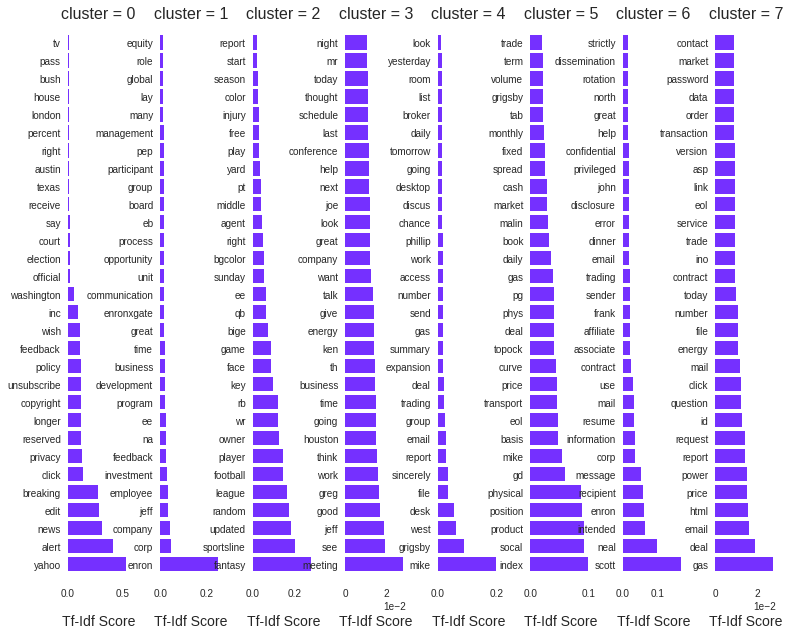

In [ ]:
features = vectorizer.get_feature_names()
plot_tfidf_classfeats_h(top_feats_per_cluster(tf_idf_m, labels, features, 0.1, 30))

## Analisis con corpus completo

In [ ]:
analysis_mails = mails['body_lemma']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_2 = TfidfVectorizer(vocabulary=my_lem_vocab['word'],max_df=0.5,min_df=2)
analysis_mails = mails['body_lemma']
tf_idf_m_2 = vectorizer_2.fit_transform(analysis_mails.tolist())

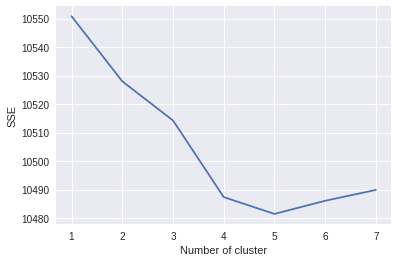

In [ ]:
sse_2 = {}
normalizer = Normalizer(copy=False)
for k in range(1, 8, 1):
    kmeans = KMeans(n_clusters=k, max_iter=1000,init='k-means++', n_init=1)
    spherical_kmeans = make_pipeline(normalizer, kmeans)
    analysis_mails["clusters"] = spherical_kmeans.fit_predict(tf_idf_m_2)
    sse_2[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse_2.keys()), list(sse_2.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [ ]:
n_clusters = 5

normalizer = Normalizer(copy=False)
clf_2 = KMeans(n_clusters=n_clusters, max_iter=100, init='k-means++', n_init=1)
spherical_kmeans = make_pipeline(normalizer, clf_2)

labels_2 = clf_2.fit_predict(tf_idf_m_2)

Para ver las palabras mas relevantes por cluster

In [ ]:
import numpy as np
def top_tfidf_feats(row, features, top_n=20):
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats, columns=['features', 'score'])
    return df

def top_feats_in_doc(X, features, row_id, top_n=25):
    row = np.squeeze(X[row_id].toarray())
    return top_tfidf_feats(row, features, top_n)
def top_mean_feats(X, features,grp_ids=None, min_tfidf=0.1, top_n=25):
  if grp_ids:
       D = X[grp_ids].toarray()
  else:
       D = X.toarray()
  D[D < min_tfidf] = 0
  tfidf_means = np.mean(D, axis=0)
  return top_tfidf_feats(tfidf_means, features, top_n)
def top_feats_per_cluster(X, y, features, min_tfidf=0.1, top_n=25):
    dfs = []
    labels = np.unique(y)
    for label in labels:
        ids = np.where(y==label) 
        feats_df = top_mean_feats(X, features, ids, min_tfidf=min_tfidf, top_n=top_n)
        feats_df.label = label
        dfs.append(feats_df)
    return dfs
def plot_tfidf_classfeats_h(dfs):
    fig = plt.figure(figsize=(12, 9), facecolor="w")
    x = np.arange(len(dfs[0]))
    for i, df in enumerate(dfs):
        ax = fig.add_subplot(1, len(dfs), i+1)
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.set_frame_on(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()
        ax.set_xlabel("Tf-Idf Score", labelpad=16, fontsize=14)
        ax.set_title("cluster = " + str(df.label), fontsize=16)
        ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
        ax.barh(x, df.score, align='center', color='#7530FF')
        ax.set_yticks(x)
        ax.set_ylim([-1, x[-1]+1])
        yticks = ax.set_yticklabels(df.features)
        plt.subplots_adjust(bottom=0.09, right=0.97, left=0.15, top=0.95, wspace=0.52)
plt.show()

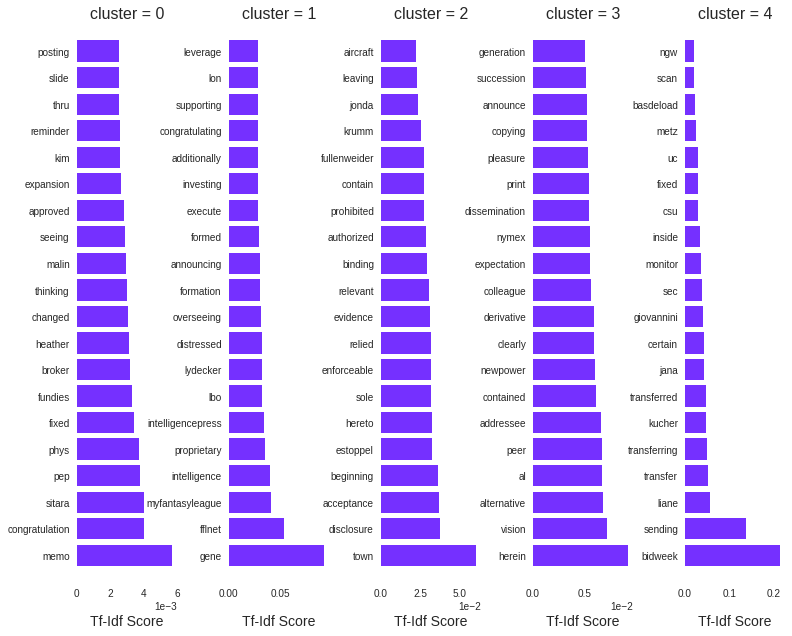

In [ ]:
features_2 = vectorizer_2.get_feature_names()
plot_tfidf_classfeats_h(top_feats_per_cluster(tf_idf_m_2, labels_2, features_2, 0.1, 20))

In [ ]:
analysis_mails_f = pd.DataFrame(analysis_mails)
analysis_mails_f['label']=labels_2

Se define una funcion que dado un dataframe y un número de cluster devuelva todos los correos pertenecientes a dicho clúster.

In [ ]:
def f_get_mails_from_cluster(df,label_n,use_mail_id=True):
  df_return = df.copy(deep=True)
  if use_mail_id==False:
    df_return = df_return.reset_index()
  return df_return.loc[df_return.label==label_n]

In [ ]:
f_get_mails_from_cluster(df=analysis_mails_f,label_n=1).head(3)

,body_lemma,label
Message-ID,,
<4384861.1075858640372.JavaMail.evans@thyme>,goldman comment enron issued morning revised p...,1
<3921460.1075855915706.JavaMail.evans@thyme>,advance agreeing speak global operation contro...,1
<24911796.1075855772924.JavaMail.evans@thyme>,advance agreeing speak global operation contro...,1


In [ ]:
f_get_mails_from_cluster(df=analysis_mails_f,label_n=1,use_mail_id=False).head(3)

,Message-ID,body_lemma,label
115,<4384861.1075858640372.JavaMail.evans@thyme>,goldman comment enron issued morning revised p...,1
220,<3921460.1075855915706.JavaMail.evans@thyme>,advance agreeing speak global operation contro...,1
228,<24911796.1075855772924.JavaMail.evans@thyme>,advance agreeing speak global operation contro...,1


# Similaridad de Documentos

In [ ]:
import gensim

In [164]:
dictionary = gensim.corpora.Dictionary(word_vector)

In [165]:
corpus = [dictionary.doc2bow(gen_doc) for gen_doc in word_vector]

In [166]:
tf_idf = gensim.models.TfidfModel(corpus)
print(tf_idf)

TfidfModel(num_docs=6977, num_nnz=417116)


## Procesamiento Similaridad

In [167]:
sims = gensim.similarities.Similarity('./',tf_idf[corpus],
                                      num_features=len(dictionary))
print(sims)
print(type(sims))

/home/kref/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:718: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


Similarity index with 6977 documents in 0 shards (stored under ./)
<class 'gensim.similarities.docsim.Similarity'>


### Query

In [168]:
from nltk.tokenize import word_tokenize

In [169]:
def make_query_tf_idf(query):
    query_doc = [w.lower() for w in word_tokenize(query)]
    query_doc_bow = dictionary.doc2bow(query_doc)
    return tf_idf[query_doc_bow]

In [139]:
def get_n_most_similar(mail_id, n):
  query = mails['body_lemma'][mail_id]
  print('------------------------ [ Query ] ------------------------')
  print(mails['body'][mail_id])
  ranking = sims[make_query_tf_idf(query)]
  sim_w_index = list(enumerate(ranking))
  x = [t[0] for t in list(reversed(sorted(sim_w_index,key=lambda x: x[1])))][1:]
  print()
  print('---------- [ Most similar emails (index, score)] ----------')
  print(list(reversed(sorted(sim_w_index,key=lambda x: x[1])))[1:n])
  print()
  print('------------------------ [ emails] ------------------------')
  for ind in x[:n]:
    print('Mail: {}'.format(ind))
    print(mails['body'][ind])
    print('---------------------------------------------------------')
  return x[:n]

In [186]:
sim_indexes = get_n_most_similar(92,5)

------------------------ [ Query ] ------------------------
hello west gas desk send mailout eol customer regarding opportunity trade odd lot every physical product eol instrumental providing liquidity previously illiquid physical delivery point west standard volume mmbtu greater notify customer eol accommodate odd lot mmbtu increment allow trade non per conversation last sorry delay help mailout see following contact kal shah additional question project anything else adriane question happy help group agree following pay cost determined depending quality mailing provide mailing list following separate column first name last name company name address city state zip give draft text mailing give working day try faster depends several factor kal

---------- [ Most similar emails (index, score)] ----------
[(92, 0.99999994), (3958, 0.7009495), (2319, 0.7009495), (1714, 0.28294533)]

------------------------ [ emails] ------------------------
Mail: 92
hello west gas desk send mailout eol cus

### Analisis Grafico

In [187]:
sim_coords = np.asarray([ coords[x] for x in sim_indexes ])

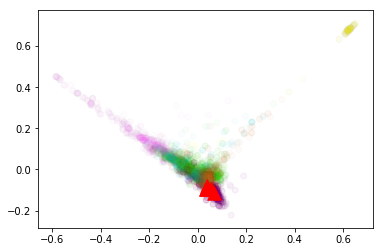

In [188]:
plt.scatter(coords[:, 0], coords[:, 1], c=color, alpha=0.025)
plt.scatter(sim_coords[:, 0], sim_coords[:, 1],marker='^', c='red',s=180)
plt.show()